# Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Read the data
data = pd.read_csv("data.csv")

In [3]:
# Take a look at the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

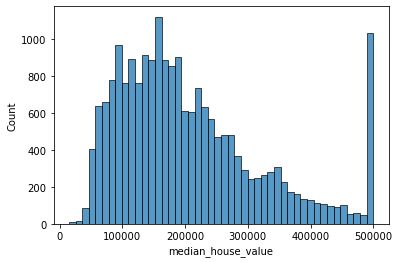

In [4]:
# Explore target variable
sns.histplot(data = data, x = "median_house_value")

In [5]:
# Select relevant features
data = data.iloc[:, :-1].copy()

In [6]:
# Take a look at the new data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1

In [7]:
# Check for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

In [8]:
data["population"].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

## Split the data

In [9]:
# Get the df index as an array
idx = np.array(data.index)

In [10]:
# Shuffle the index
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
# Shuffle the data
shuffled_data = data.iloc[idx]

In [12]:
# Calculate lenght of each data segment
len_data = len(data)

len_train = int(len_data * 0.6)
len_val = int(len_data * 0.2)
len_test = len_data - len_train - len_val

In [13]:
# Split the data in tran/val/test
train_data = shuffled_data.iloc[:len_train]
val_data = shuffled_data.iloc[len_train: len_train + len_val]
test_data = shuffled_data.iloc[len_train + len_val:]

In [14]:
# Split each segment into features and target
y_train = train_data["median_house_value"]
X_train = train_data.drop(columns = "median_house_value")

y_val = val_data["median_house_value"]
X_val = val_data.drop(columns = "median_house_value")

y_test = test_data["median_house_value"]
X_test = test_data.drop(columns = "median_house_value")

In [15]:
# Log transform the target variable
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

## Question 3

#### Model 1: fill null values with zeros

In [16]:
# Fill the null values with 0
X_train1 = X_train.fillna(0)
X_val1 = X_val.fillna(0)

In [17]:
from sklearn.linear_model import LinearRegression

# Make predictions using linear regression
lr1 = LinearRegression()
lr1.fit(X_train1, y_train)
predictions1 = lr1.predict(X_val1)

In [18]:
from sklearn.metrics import mean_squared_error

# Score the model using RMSE
score1 = round(mean_squared_error(y_val, predictions1, squared = False), 2)
score1

0.33

#### Model 2: fill null values with mean

In [19]:
# Fill the null values with 0
X_train2 = X_train.fillna(X_train["total_bedrooms"].mean())
X_val2 = X_val.fillna(X_train["total_bedrooms"].mean())

In [20]:
from sklearn.linear_model import LinearRegression

# Make predictions using linear regression
lr2 = LinearRegression()
lr2.fit(X_train2, y_train)
predictions2 = lr2.predict(X_val2)

In [21]:
# Score the model using RMSE
score2 = round(mean_squared_error(y_val, predictions2, squared = False), 2)
score2

0.33

In [22]:
print("The RMSE when we fill null values with 0 is:", score1)
print("The RMSE when we fill null values with the mean is:", score2)

The RMSE when we fill null values with 0 is: 0.33
The RMSE when we fill null values with the mean is: 0.33


## Question 4

In [23]:
# Initializes dictionary to contain scores
scores = {}

In [24]:
# Set the list of regularization parameters
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [25]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred    

In [26]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T @ X
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y
    
    return w_full[0], w_full[1:]

In [27]:
for r in r_values:
    w0, w = train_linear_regression_reg(X_train1, y_train, r)
    predictions = X_val1.apply(linear_regression, axis = 1)
    score = np.round(mean_squared_error(y_val, predictions, squared = False), 2)
    scores[r] = score

<AxesSubplot:>

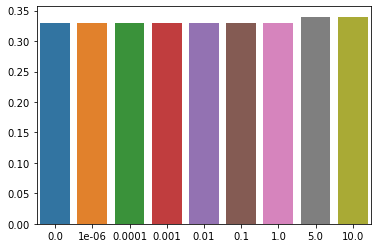

In [28]:
sns.barplot(x = list(scores.keys()), y = list(scores.values()))

In [29]:
answer = min(scores, key = scores.get)
print(answer)

0


In [30]:
scores

{0: 0.33,
 1e-06: 0.33,
 0.0001: 0.33,
 0.001: 0.33,
 0.01: 0.33,
 0.1: 0.33,
 1: 0.33,
 5: 0.34,
 10: 0.34}

## Question 5

In [31]:
scores = []

In [32]:
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.array(data.index)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    shuffled_data = data.iloc[idx]
    
    len_train = int(len_data * 0.6)
    len_val = int(len_data * 0.2)
    
    train_data = shuffled_data.iloc[:len_train]
    val_data = shuffled_data.iloc[len_train: len_train + len_val]
    
    y_train = train_data["median_house_value"]
    X_train = train_data.drop(columns = "median_house_value").fillna(0)

    y_val = val_data["median_house_value"]
    X_val = val_data.drop(columns = "median_house_value").fillna(0)
    
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    predictions = lr2.predict(X_val)
    
    score = np.round(mean_squared_error(y_val, predictions, squared = False), 2)
    scores.append(score)

In [33]:
answer = np.std(scores)
answer

0.005385164807134491

## Question 6

In [34]:
# Get the df index as an array
idx = np.array(data.index)

In [35]:
# Shuffle the index
np.random.seed(9)
np.random.shuffle(idx)

In [36]:
# Shuffle the data
shuffled_data = data.iloc[idx]

In [37]:
# Calculate lenght of each data segment
len_data = len(data)

len_train = int(len_data * 0.6)
len_val = int(len_data * 0.2)
len_test = len_data - len_train - len_val

In [38]:
# Split the data in tran/val/test
train_data = shuffled_data.iloc[:len_val]
test_data = shuffled_data.iloc[len_val:]

In [39]:
# Split each segment into features and target
y_train = train_data["median_house_value"]
X_train = train_data.drop(columns = "median_house_value").fillna(0)

y_test = test_data["median_house_value"]
X_test = test_data.drop(columns = "median_house_value").fillna(0)

In [40]:
# Log transform the target variable
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [41]:
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)
predictions = X_test.apply(linear_regression, axis = 1)

In [42]:
score = mean_squared_error(y_test, predictions, squared = False)
score

0.3422203595524887